# Sarah Higgins Final Project Queries

These are the queries that we will be using for the final project in Big Data Programming

In [53]:
import findspark
findspark.init('/home/sarah/spark-2.4.3-bin-hadoop2.7')

In [54]:
# create entry points to spark
try:
    sc.stop()
except:
    pass
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName("lecture15").setMaster("local[*]")
sc=SparkContext(conf = conf)
spark = SparkSession(sparkContext=sc)
#spark = SparkSession.builder.appName('Basics').getOrCreate()

In [59]:
df = spark.read.csv('/home/sarah/Documents/Big Data Programming/Final Project/fbpac-ads-en-US.csv', inferSchema=True, header=True)

In [60]:
df.count()

164114

In [61]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- html: string (nullable = true)
 |-- political: string (nullable = true)
 |-- not_political: string (nullable = true)
 |-- title: string (nullable = true)
 |-- message: string (nullable = true)
 |-- thumbnail: string (nullable = true)
 |-- created_at: string (nullable = true)
 |-- updated_at: string (nullable = true)
 |-- lang: string (nullable = true)
 |-- images: string (nullable = true)
 |-- impressions: string (nullable = true)
 |-- political_probability: string (nullable = true)
 |-- targeting: string (nullable = true)
 |-- suppressed: string (nullable = true)
 |-- targets: string (nullable = true)
 |-- advertiser: string (nullable = true)
 |-- entities: string (nullable = true)
 |-- page: string (nullable = true)
 |-- lower_page: string (nullable = true)
 |-- targetings: string (nullable = true)
 |-- paid_for_by: string (nullable = true)
 |-- targetedness: string (nullable = true)
 |-- listbuilding_fundraising_proba: string (nullable = t

### Display which politcal ads were created before the 2016 Presidential Election 

In [62]:
df.select(df['political'], df['title'], df['created_at'] <= '2016-11-08').show()

+--------------------+--------------------+--------------------------+
|           political|               title|(created_at <= 2016-11-08)|
+--------------------+--------------------+--------------------------+
|000 people who ha...|                   0|                      true|
| doubling your im...|                   3|                     false|
| we’ll have to TU...|                   3|                     false|
| where hundreds o...| please try resta...|                     false|
| the second longe...| so now he’s the ...|                      true|
|OOO on blistering...|                   2|                     false|
| joy is hard to c...|                   0|                      true|
|              flyers|                   3|                      true|
| <a class=""profi...|                   1|                     false|
|000 signatures</d...|                   0|                     false|
| these progressiv...| which rewarded h...|                     false|
|     

### Display the number of political vs non-political ads: 

In [ ]:
df.select(df['not_political'], df['title'], df['created_at'] <= '2016-11-08').show()

In [ ]:
df.select(df['targetedness']).show(truncate = False)

### Show the most popular politcal ad shared on Facebook: 

In [ ]:
df.groupBy(df['political'], df['title']).max().show(truncate = False)

In [26]:
df.groupBy(df['political_probability'], df['title']).max().show(truncate = False)
# prob.groupBy('political_probability').max().show()

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
df.select(df['entities'])

DataFrame[entities: string]

# Parties Responses: 

### Those who responded as Conservative:

In [20]:
conservatives = df.filter("targetedness like '%""Conservative""%'").distinct()
print("Conservatives: ")
conservatives.count()

Conservatives: 


19

### Those who responded as Republican:

In [21]:
republicans = df.filter("targetedness like '%""Republican Party""%'").distinct()
print("Republicans: ")
republicans.count()

Republicans: 


127

### Those who responded as Liberal:

In [22]:
libs = df.filter("targetedness like '%""Liberal""%'").distinct()
print("Liberals: ")
libs.count()

Liberals: 


8

### Those who responded as Democrat:

In [ ]:
dems = df.filter("targetedness like '%""Democratic Party""%'").distinct()
print("Democrats: ")
dems.count()

Democrats: 


### Those who responded as Independent:

In [28]:
ind = df.filter("targetedness like '%""Independent""%'").distinct()
print("Independent: ")
ind.count()

Independent: 


23

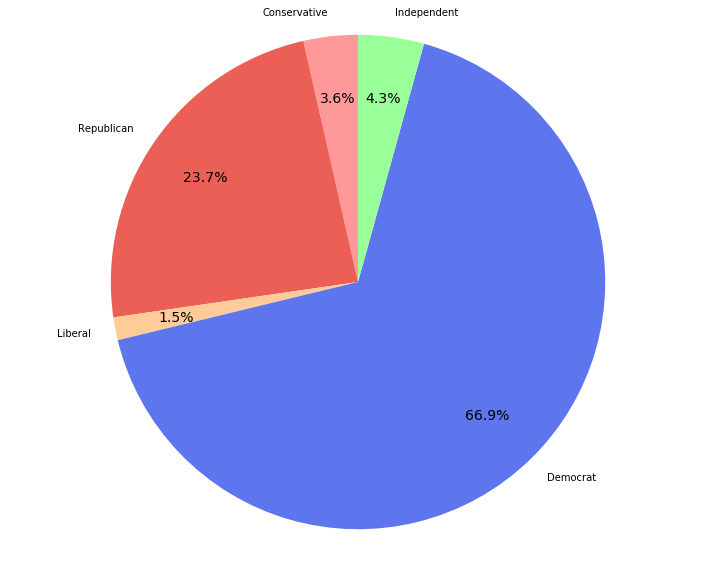

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from scipy import stats


parties_dict = {
    'Conservative': 19,
    'Republican': 127,
    'Liberal': 8,
    'Democrat': 358,
    'Independent': 23
}

labels = ['Conservative', 'Republican', 'Liberal', 'Democrat', 'Independent']
sizes = [19, 127, 8, 358, 23]
colors = ['#ff9999','#ec5f57','#ffcc99', '#5d76ee', '#99ff99']

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=90, radius = 3200, pctdistance=0.75)#draw circle

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
dems = df.filter("targetedness like '%""Democratic Party""%'").distinct()

In [ ]:
df.select('targetedness').show(900, truncate = False)

### All States Responses:

In [ ]:
Alabama = df.filter("targetedness like '%""Alabama""%'")
print("Alabama: ")
Alabama.count()

In [ ]:
Alaska = df.filter("targetedness like '%""Alaska""%'")
print("Alaska: ")
Alaska.count()

In [ ]:
Arizona = df.filter("targetedness like '%""Arizona""%'")
print("Arizona: ")
Arizona.count()

In [ ]:
Arkansas = df.filter("targetedness like '%""Arkansas""%'")
print("Arkansas: ")
Arkansas.count()

In [ ]:
California = df.filter("targetedness like '%""California""%'")
print("California: ")
California.count()

In [ ]:
Colorado = df.filter("targetedness like '%""Colorado""%'")
print("Colorado: ")
Colorado.count()

In [ ]:
Connecticut = df.filter("targetedness like '%""Connecticut""%'")
print("Connecticut: ")
Connecticut.count()

In [ ]:
Delaware = df.filter("targetedness like '%""Delaware""%'")
print("Delaware: ")
Delaware.count()

In [ ]:
Florida = df.filter("targetedness like '%""Florida""%'")
print("Florida: ")
Florida.count()

In [ ]:
Georgia = df.filter("targetedness like '%""Georgia""%'")
print("Georgia: ")
Georgia.count()

In [ ]:
Hawaii = df.filter("targetedness like '%""Hawaii""%'")
print("Hawaii: ")
Hawaii.count()

In [ ]:
Idaho = df.filter("targetedness like '%""CIdaho""%'")
print("Idaho: ")
Idaho.count()

In [ ]:
Illinois = df.filter("targetedness like '%""Illinois""%'")
print("Illinois: ")
Illinois.count()

In [ ]:
Indiana = df.filter("targetedness like '%""Indiana""%'")
print("Indiana: ")
Indiana.count()

In [ ]:
Iowa = df.filter("targetedness like '%""Iowa""%'")
Iowa.count()

In [ ]:
Kansas = df.filter("targetedness like '%""Kansas""%'")
print("Kansas: ")
Kansas.count()

In [ ]:
Kentucky = df.filter("targetedness like '%""Kentucky""%'")
print("Kentucky: ")
Kentucky.count()

In [ ]:
Louisiana = df.filter("targetedness like '%""Louisiana""%'")
print("Louisiana: ")
Louisiana.count()

In [ ]:
Maine = df.filter("targetedness like '%""Maine""%'")
print("Maine: ")
Maine.count()

In [ ]:
Maryland = df.filter("targetedness like '%""Maryland""%'")
print("Maryland: ")
Maryland.count()

In [ ]:
Massachusetts = df.filter("targetedness like '%""Massachusetts""%'")
print("Massachusetts: ")
Massachusetts.count()

In [ ]:
Michigan = df.filter("targetedness like '%""Michigan""%'")
print("Michigan: ")
Michigan.count()

In [ ]:
Minnesota = df.filter("targetedness like '%""Minnesota""%'")
print("Minnesota: ")
Minnesota.count()

In [ ]:
Mississippi = df.filter("targetedness like '%""Mississippi""%'")
print("Mississippi: ")
Mississippi.count()

In [ ]:
Missouri = df.filter("targetedness like '%""Missouri""%'")
print("Missouri: ")
Missouri.count()

In [ ]:
Montana = df.filter("targetedness like '%""Montana""%'")
print("Montana: ")
Montana.count()

In [ ]:
Nebraska = df.filter("targetedness like '%""Nebraska""%'")
print("Nebraska: ")
Nebraska.count()

In [ ]:
Nevada = df.filter("targetedness like '%""Nevada""%'")
print("Nevada: ")
Nevada.count()

In [ ]:
NewHampshire = df.filter("targetedness like '%""New Hampshire""%'")
print("New Hampshire: ")
NewHampshire.count()

In [ ]:
NewJersey = df.filter("targetedness like '%""New Jersey""%'")
print("New Jersey: ")
NewJersey.count()

In [ ]:
NewMexico = df.filter("targetedness like '%""New Mexico""%'")
print("New Mexico: ")
NewMexico.count()

In [ ]:
NewYork = df.filter("targetedness like '%""New York""%'")
print("New York: ")
NewYork.count()

In [ ]:
NorthCarolina = df.filter("targetedness like '%""North Carolina""%'")
print("North Carolina: ")
NorthCarolina.count()

In [ ]:
NorthDakota = df.filter("targetedness like '%""North Dakota""%'")
print("North Dakota: ")
NorthDakota.count()

In [ ]:
Ohio = df.filter("targetedness like '%""Ohio""%'")
print("Ohio: ")
Ohio.count()

In [ ]:
Oklahoma = df.filter("targetedness like '%""Oklahoma""%'")
print("Oklahoma: ")
Oklahoma.count()

In [ ]:
Oregon = df.filter("targetedness like '%""Oregon""%'")
print("Oregon: ")
Oregon.count()

In [ ]:
Pennsylvania = df.filter("targetedness like '%""Pennsylvania""%'")
print("Pennsylvania: ")
Pennsylvania.count()

In [ ]:
RhodeIsland = df.filter("targetedness like '%""Rhode Island""%'")
print("Rhode Island: ")
RhodeIsland.count()

In [ ]:
SouthCarolina = df.filter("targetedness like '%""South Carolina""%'")
print("South Carolina: ")
SouthCarolina.count()

In [ ]:
SouthDakota = df.filter("targetedness like '%""South Dakota""%'")
print("South Dakota: ")
SouthDakota.count()

In [ ]:
Tennessee = df.filter("targetedness like '%""Tennessee""%'")
print("Tennessee: ")
Tennessee.count()

In [ ]:
Texas = df.filter("targetedness like '%""Texas""%'")
print("Texas: ")
Texas.count()

In [ ]:
Utah = df.filter("targetedness like '%""Utah""%'")
print("Utah: ")
Utah.count()

In [ ]:
Vermont = df.filter("targetedness like '%""Vermont""%'")
print("Vermont: ")
Vermont.count()

In [ ]:
Virginia = df.filter("targetedness like '%""Virginia""%'")
print("Virginia: ")
Virginia.count()

In [ ]:
Washington = df.filter("targetedness like '%""Washington""%'")
print("Washington: ")
Washington.count()

In [ ]:
WestVirginia = df.filter("targetedness like '%""West Virginia""%'")
print("West Virginia: ")
WestVirginia.count()

In [ ]:
Wisconsin = df.filter("targetedness like '%""Wisconsin""%'")
print("Wisconsin: ")
Wisconsin.count()

In [ ]:
Wyoming = df.filter("targetedness like '%""Wyoming""%'")
print("Wyoming: ")
Wyoming.count()

In [ ]:
MA = df.filter("targetedness like '%""Boston""%'")
MA.count()

In [33]:
states_dict = {
    'AL': 109,
    'AK': 107,
    'AZ': 225,
    'AR': 14,
    'CA': 671,
    'CO': 247,
    'CT': 49,
    'DE': 10,
    'FL': 520,
    'GA': 179,
    'HI': 6,
    'ID': 0,
    'IL': 123,
    'IN': 114,
    'IA': 79,
    'KS': 56,
    'KY': 39,
    'LA': 16,
    'ME': 75,
    'MD': 119,
    'MA': 165,
    'MI': 216,
    'MN': 174,
    'MSi': 21,
    'MO': 138,
    'MT': 83,
    'NE': 24,
    'NV': 74,
    'NH': 21,
    'NJ': 67,
    'NM': 70,
    'NY': 409,
    'NC': 147,
    'ND': 99,
    'OH': 195,
    'OK': 98,
    'OR': 148,
    'PA': 135,
    'RI': 9,
    'SC': 18,
    'SD': 9,
    'TN': 65,
    'TX': 494,
    'UT': 33,
    'VT': 12,
    'VA': 126,
    'WA': 372,
    'WV': 20,
    'WI': 116,
    'WY': 14

}



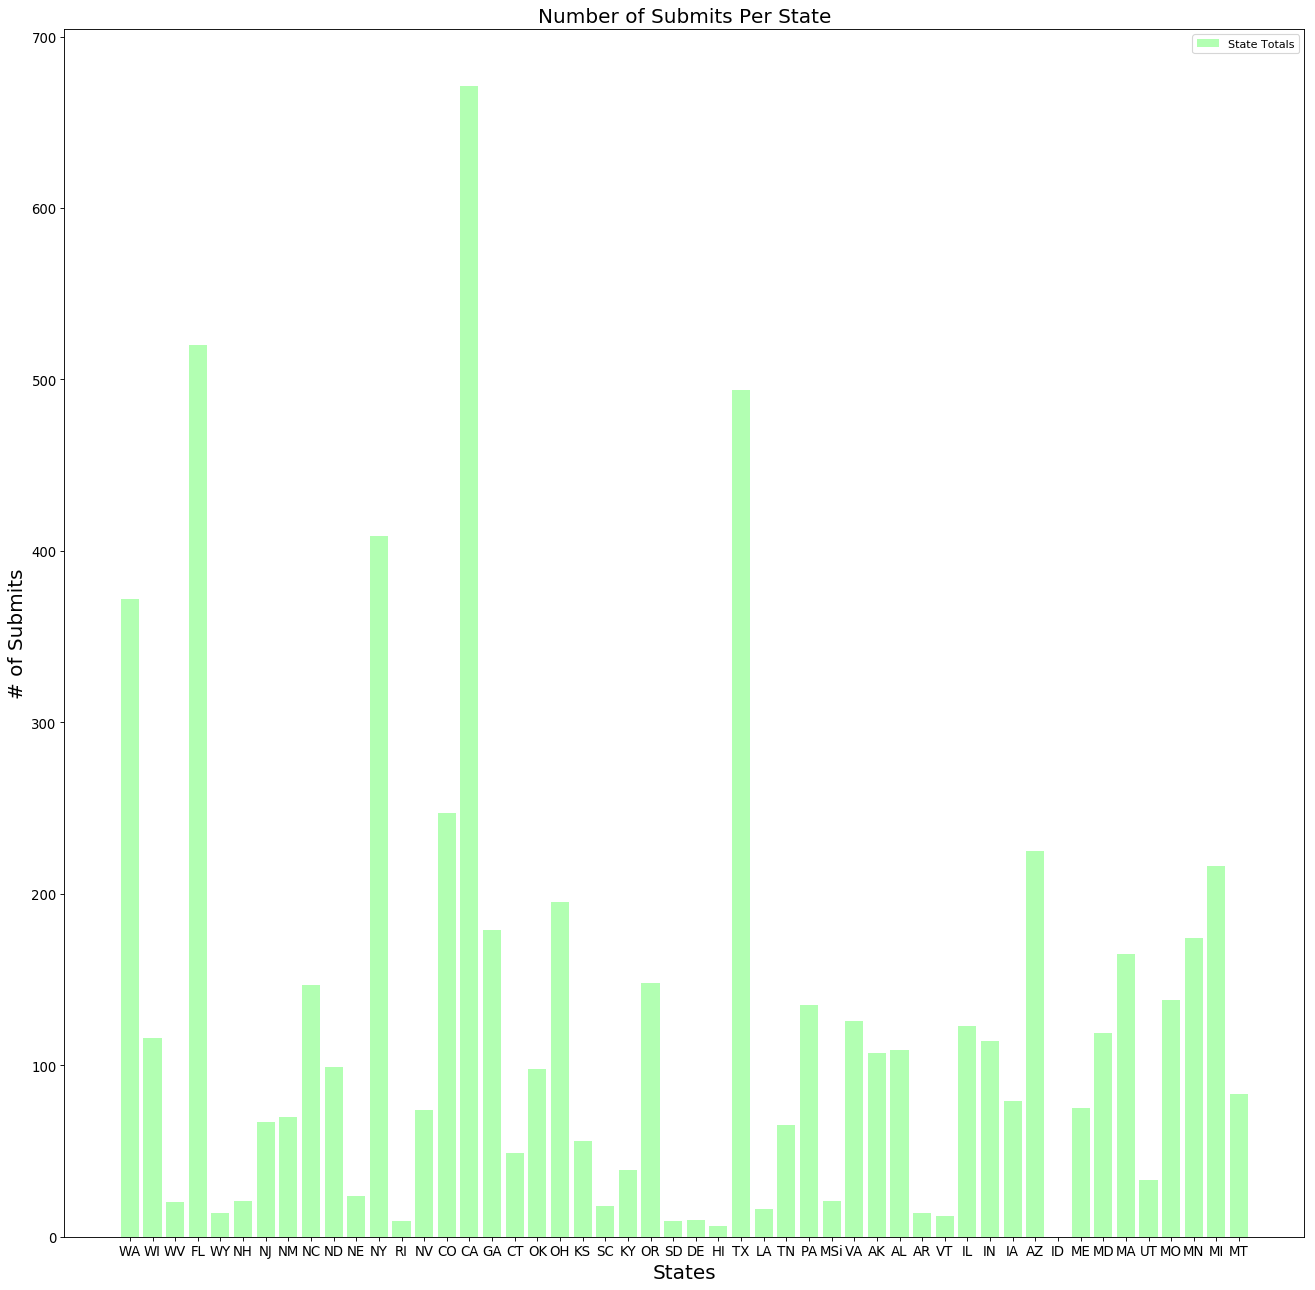

In [49]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')
plt.bar(states_dict.keys(), states_dict.values(), color='lime', alpha = 0.3)
plt.title('Number of Submits Per State', fontsize=18)
plt.legend(['State Totals'])
plt.ylabel('# of Submits', fontsize=18)
plt.xlabel('States', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
notPolitical = df.select(df['not_political']).distinct()
notPolitical.count()

In [ ]:
political = df.select(df['political']).distinct()
political.count()

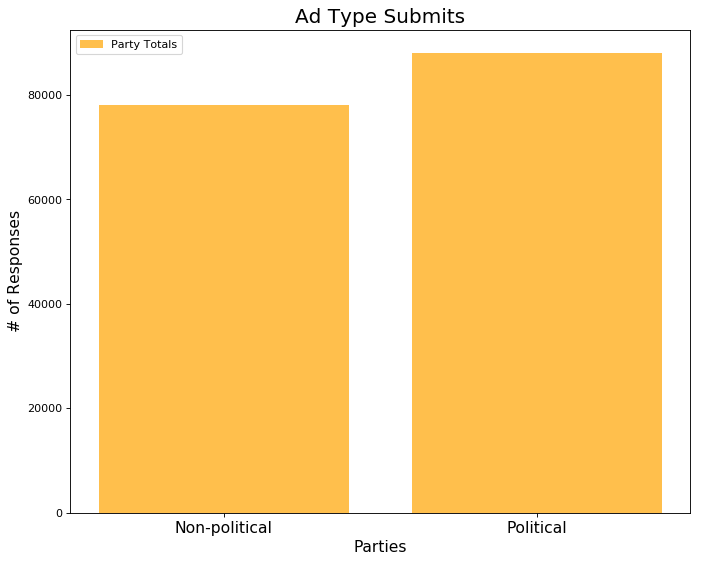

In [52]:
parties_dict = {
    'Non-political': 77995,
    'Political': 88117
}

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.bar(parties_dict.keys(), parties_dict.values(), color='orange', alpha = 0.7)
plt.title('Ad Type Submits', fontsize=18)
plt.legend(['Party Totals'])
plt.ylabel('# of Responses', fontsize=14)
plt.xlabel('Parties', fontsize=14)
plt.xticks(fontsize=14)
plt.show()

In [ ]:
df.select(df['message']).distinct().count()


In [ ]:
messages = df.select(df['message']).distinct().show(500, truncate = False)
messages.filter()

In [ ]:
from pyspark.sql.functions import *
    
df.select(df['title']).distinct().show(500, truncate = False)